## Quantium Virtual Internship

This Task 1 from the Quantium Virtual Internship where we tasked to do Data Assessment and Exploratory Data Analysis
- **Name**: Muhoza Bizumuremyi
- **Linkedin**:https://www.linkedin.com/in/muhozaursus/
- **Email**: writetoursus@gmail.com
- **Phone**: +1(469)639-5382
- **Address**: 14025 Coyote Trl, FortWorth, TX

### A. Data Assessment

#### 0. Importing Libraries and Datasets

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date, timedelta
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
#Importing Datasets
## Customers dataset
customers=pd.read_csv('QVI_purchase_behaviour.csv')
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
##Transaction Dataset
transactions=pd.read_excel('QVI_transaction_data.xlsx')
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### 1. Checking Datasets Types and Formats

In [4]:
#customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#transactions
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


#### 2. Merging the 2 Datasets

To save time, we can analyzed the 2 datasets combined together

In [6]:
##customers
data=transactions.merge(customers, on='LYLTY_CARD_NBR', how='left')
data.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
225009,43435,183,183028,184938,54,CCs Original 175g,2,4.2,YOUNG FAMILIES,Premium
33350,43458,7,7191,7076,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,OLDER FAMILIES,Budget
44822,43473,138,138113,141182,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,OLDER FAMILIES,Budget
182913,43563,227,227108,228935,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2,RETIREES,Premium
135651,43601,235,235339,238406,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,RETIREES,Budget


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [8]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### 3. Checking if there null values

In [9]:
# As we can see there are no empty variables in this datasets
data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### 4.Checking if there are any duplicates

In [10]:
data[data.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


we can see that there are duplicates

In [11]:
# droping duplicates
data.drop_duplicates(inplace=True)

#### 5. Untrue value formats

we can see that the date column is not in date format, its in int format.

In [12]:
data['DATE']=pd.to_datetime(data['DATE'].apply(lambda x: date(1899,12,30)+timedelta(x)))

In [13]:
#As we can see the date has changed its format from int to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_NAME         264835 non-null  object        
 6   PROD_QTY          264835 non-null  int64         
 7   TOT_SALES         264835 non-null  float64       
 8   LIFESTAGE         264835 non-null  object        
 9   PREMIUM_CUSTOMER  264835 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


#### 6. Incorrect Entries

In [14]:
# we have 114 unique products
data['PROD_NAME'].nunique()

114

In [15]:
# Since were are interested only in chips
data_chip=data[data['PROD_NAME'].str.contains('Chip')]

In [16]:
# Considering only CHIPS products we are remained with only 21 unique products"
data_chip['PROD_NAME'].value_counts()

Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Cobs Popd Sea Salt  Chips 110g              3265
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Doritos Corn Chips  Cheese Supreme 170g     3217
Doritos Corn Chip Mexican Jalapeno 150g     3204
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Doritos Corn Chip Southern Chicken 150g     3172
Doritos Corn Chips  Nacho Cheese 170g       3160
Cobs Popd Sour Crm  &Chives Chips 110g      3159
Tostitos Smoked     Chipotle 175g           3145
Doritos Corn Chips  Original 170g           3121
Thins Chips Seasonedchicken 175g            3114
Thins Chips Salt &  Vinegar 175g            3103
Smiths Chip Thinly  Cut Original 175g       1614
Natural Chip Co     Tmato Hrb&Spce 175g     1572
Natural ChipCo Sea  Salt & Vinegr 175g      1550
WW Supreme Cheese   Corn Chips 200g         1509
WW Original Corn    Chips 200g              1495
Smiths Crinkle Cut  

In [17]:
data_chip.reset_index(drop=True, inplace=True)
data_chip.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget


In [18]:
data_chip.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000
mean,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511
std,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000
50%,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000
75%,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000


#### 7. Checking for Outliers

In [19]:
#As we can see in the product Quantity there are no extreme values
data_chip['PROD_QTY'].unique()

array([2, 5, 1, 4, 3], dtype=int64)

In [20]:
#As we can see here into the date column the first transaction was made in 2018 and the last made in 2019
## No extreme values here too
print(data['DATE'].min(), data['DATE'].max())

2018-07-01 00:00:00 2019-06-30 00:00:00


#### 8. Creating new column: product size (PROD_SIZE)

In [21]:
data_chip['PROD_SIZE']=data_chip['PROD_NAME'].apply(lambda x: x[-4:-1])

In [22]:
data_chip.sample(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE
45029,2019-05-29,113,113211,116801,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,RETIREES,Mainstream,160
5247,2019-04-17,48,48149,43971,5,Natural Chip Compny SeaSalt175g,2,6.0,MIDAGE SINGLES/COUPLES,Premium,175
67991,2019-02-07,34,34289,31493,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,YOUNG SINGLES/COUPLES,Mainstream,330


#### 9. Creating an other feature: product brand (PROD_BRAND)

In [23]:
data_chip['PROD_BRAND']=data_chip['PROD_NAME'].apply(lambda x: x.split()[0])

In [24]:
data_chip['PROD_BRAND'].value_counts()

Smiths      16872
Doritos     15874
Thins       14075
Cobs         9693
WW           7443
Natural      6050
Tostitos     3145
French       1418
Name: PROD_BRAND, dtype: int64

In [25]:
data_chip.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PROD_SIZE           0
PROD_BRAND          0
dtype: int64

#### 10. Save the dataset

In [26]:
data_chip.to_csv('data_chip.csv')

### B. Basic Exploratory Analysis

#### 1. Top 20 Stores that sold alot of chips

In [27]:
# Top 20 Stores with alot of transactions
data_chip['STORE_NBR'].value_counts()[0:20]

226    542
93     536
213    523
230    522
157    514
43     512
152    510
100    509
156    508
128    505
257    501
184    501
88     499
237    494
69     493
165    493
4      490
63     489
223    488
168    484
Name: STORE_NBR, dtype: int64

#### 2. Preferred Product Size

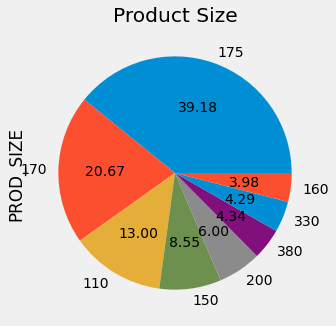

In [28]:
plt.figure(figsize=(5,5))
data_chip['PROD_SIZE'].value_counts().plot(kind='pie', autopct='%.2f', title='Product Size');

Size 175g is more preferred with almost 40% of transactions made 

#### 3. Total Sales by LIFESTAGE

In [29]:
data_chip.groupby('LIFESTAGE')['TOT_SALES'].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES     49138.1
NEW FAMILIES               13045.8
OLDER FAMILIES             94413.8
OLDER SINGLES/COUPLES     105931.2
RETIREES                   95448.3
YOUNG FAMILIES             85164.7
YOUNG SINGLES/COUPLES      68446.4
Name: TOT_SALES, dtype: float64

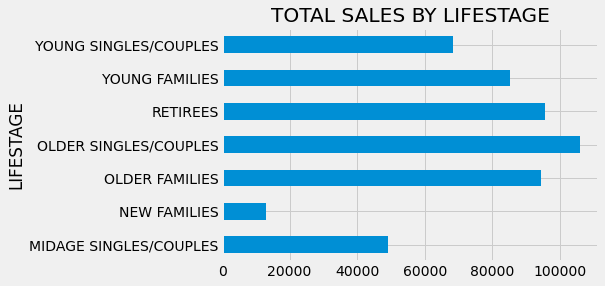

In [30]:
data_chip.groupby('LIFESTAGE')['TOT_SALES'].sum().plot(kind='barh', title='TOTAL SALES BY LIFESTAGE');

More sales are coming from older singles/couples

#### 4. Total sales by PREMIUM_CUSTOMER

In [31]:
data_chip.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        180184.9
Mainstream    197980.7
Premium       133422.7
Name: TOT_SALES, dtype: float64

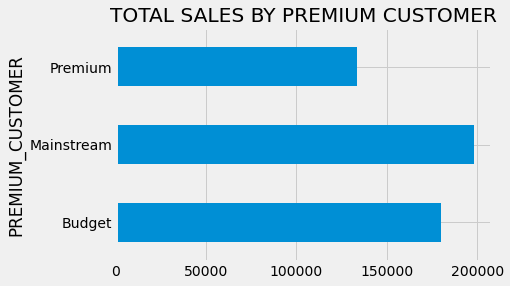

In [32]:
data_chip.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind='barh', title='TOTAL SALES BY PREMIUM CUSTOMER');

More sales are coming from Mainstream

#### 5. Preferred Product Brand

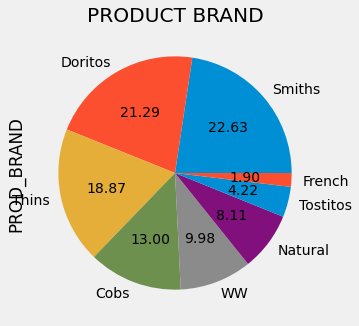

In [33]:
plt.figure(figsize=(5,5))
data_chip['PROD_BRAND'].value_counts().plot(kind='pie', autopct='%.2f', title='PRODUCT BRAND');

Smith and Doritos have been bought more often

#### 6.Total Sales by Product Brand

In [34]:
data_chip.groupby(['PROD_BRAND'])['TOT_SALES'].sum()

PROD_BRAND
Cobs         70569.8
Doritos     127597.3
French        7929.0
Natural      34272.0
Smiths      129237.8
Thins        88852.5
Tostitos     26474.8
WW           26655.1
Name: TOT_SALES, dtype: float64

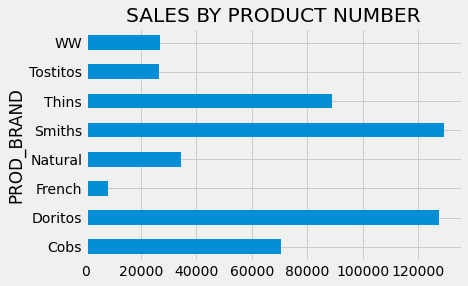

In [35]:
data_chip.groupby(['PROD_BRAND'])['TOT_SALES'].sum().plot(kind='barh', title='SALES BY PRODUCT NUMBER');

#### 7. Total Sales and Average sale per customer by Premium customer and Lifestage

In [38]:
data_chip.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES     9838.3
                  NEW FAMILIES               5651.4
                  OLDER FAMILIES            44859.2
                  OLDER SINGLES/COUPLES     35943.0
                  RETIREES                  30051.8
                  YOUNG FAMILIES            37064.1
                  YOUNG SINGLES/COUPLES     16777.1
Mainstream        MIDAGE SINGLES/COUPLES    23950.4
                  NEW FAMILIES               4307.1
                  OLDER FAMILIES            28298.5
                  OLDER SINGLES/COUPLES     35443.2
                  RETIREES                  40592.1
                  YOUNG FAMILIES            25319.5
                  YOUNG SINGLES/COUPLES     40069.9
Premium           MIDAGE SINGLES/COUPLES    15349.4
                  NEW FAMILIES               3087.3
                  OLDER FAMILIES            21256.1
                  OLDER SINGLES/COUPLES     34545.0
                  RETIR

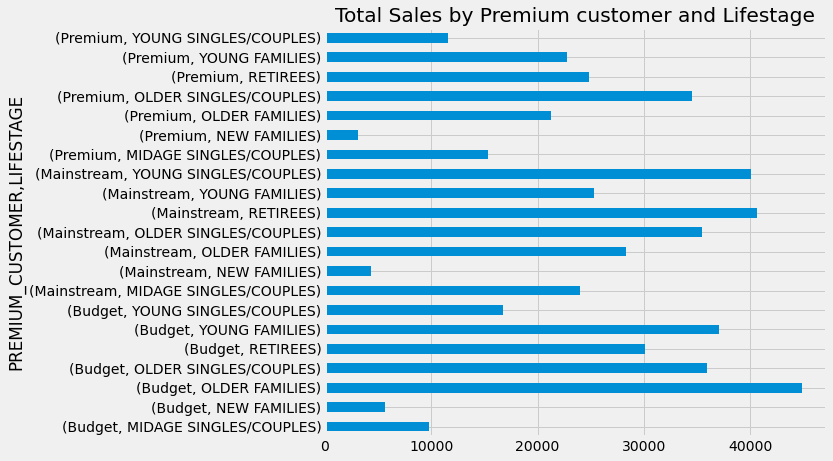

In [39]:
plt.figure(figsize=(8,7))
data_chip.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().plot(kind='barh', title='Total Sales by Premium customer and Lifestage');

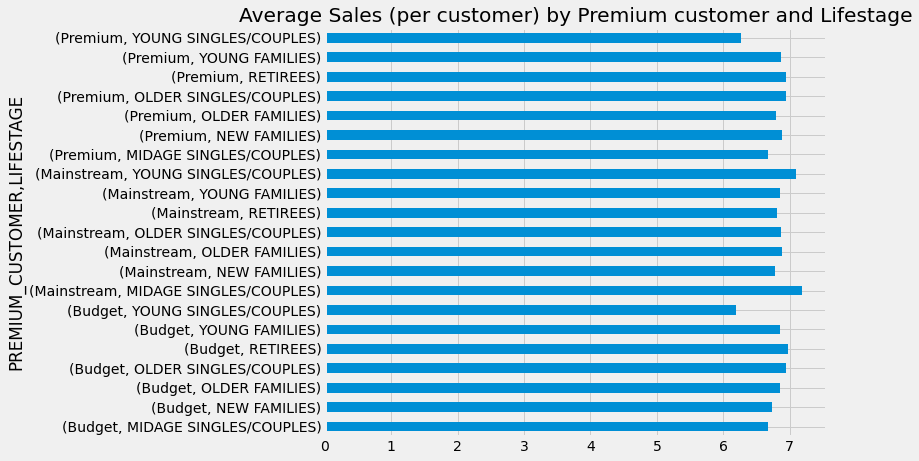

In [40]:
plt.figure(figsize=(8,7))
data_chip.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].mean().plot(kind='barh', title='Average Sales (per customer) by Premium customer and Lifestage');

 As the two graphs above suggests **Mainstream midage singles/couples** and **Mainstream young singles/couples** are willing to pay more per person even **Budget Older families** and **mainstream retirees** paid more in total sales

#### 8.Brands and Customer Segments

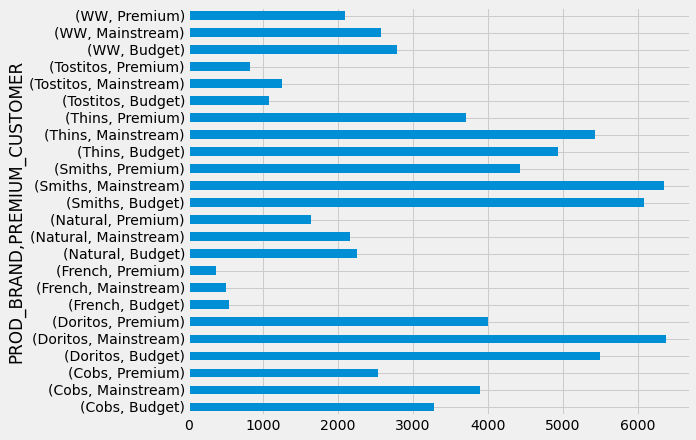

In [41]:
plt.figure(figsize=(8,7))
data_chip.groupby(['PROD_BRAND','PREMIUM_CUSTOMER'])['PROD_NAME'].count().plot(kind='barh');

For Doritos, Cobs, Smiths, Thins and Tostitos: the mainstream segment bought more, for the rest the budget segment bought more than other semgents

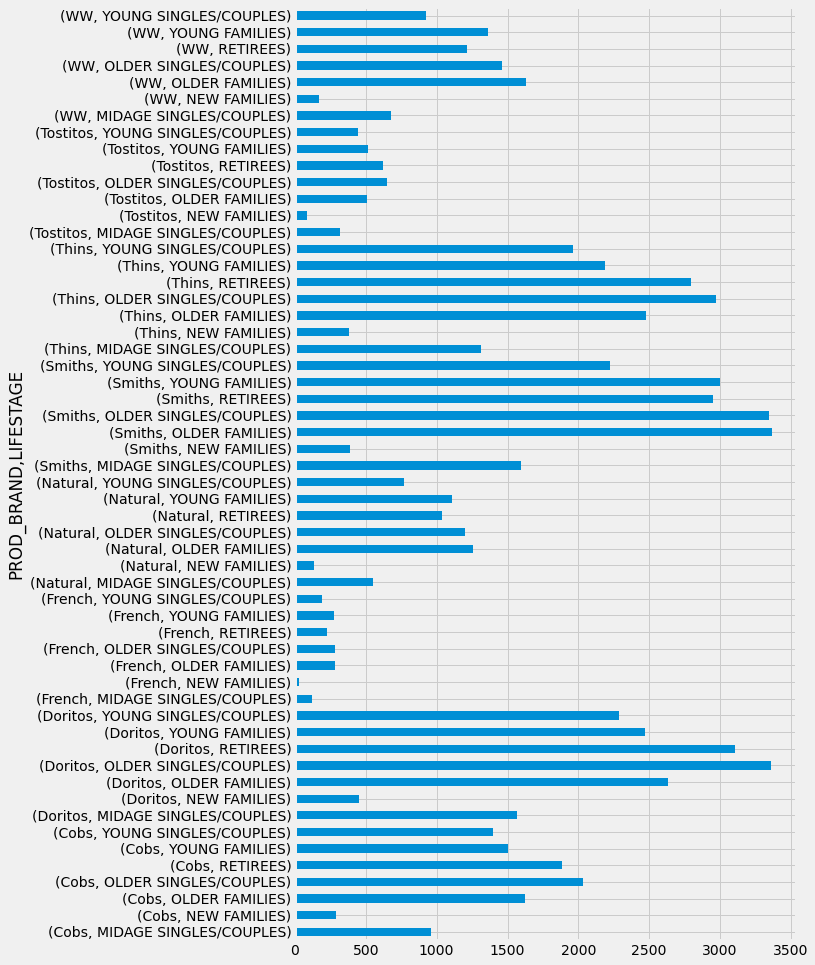

In [42]:
plt.figure(figsize=(8,16))
data_chip.groupby(['PROD_BRAND','LIFESTAGE'])['PROD_NAME'].count().plot(kind='barh');

In this graph above we can see any customer segment and the number of chips they have purchased: for example for Doritos: Older and single couples have bought more than other couples, we see older couples buying more smiths, etc...

#### 9. Total Sales through out the whole year

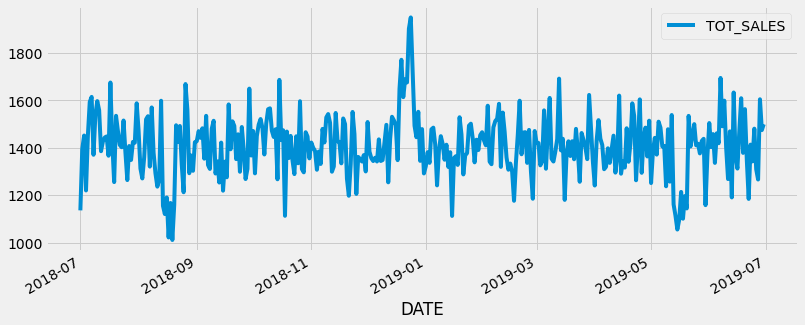

In [54]:
pd.DataFrame(data_chip.groupby('DATE')['TOT_SALES'].sum()).plot(figsize=(12,5));

we see sales increase during January 2019, and drop around september 2018 and May-June 2019